#  La data visualisation avec Python (1ère partie)

In [ ]:
import numpy as np
import pandas as pd

De nombreux packages sont disponibles en Python pour représenter des données
de manière attractive.

Le plus connu est Matplotlib et sert de base à de nombreux autres packages.

## 1. Construction de graphiques avec matplotlib

### 1.1 Afficher des graphiques

Matplotlib est un package complet pour la data visualisation. Il est basé sur la
construction de graphiques en utilisant des commandes simples.

On commence par importer le module pyplot du package :

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Le principe du développement de graphiques avec Matplotlib est toujours le
même : on peuple notre graphique petit à petit et, une fois le graphique terminé, on soumet le code et on affiche le graphique (avec plt.show() dans votre IDE classique ou en soumettant la cellule dans votre notebook).

Par ailleurs, il existe deux manières de construire des graphiques avec Matplotlib.

On peut enchaîner les traitements et finalement afficher un graphique :

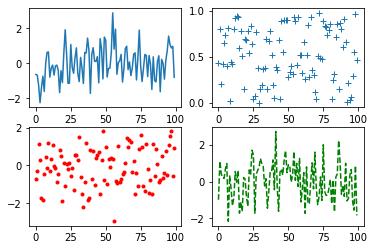

In [6]:
# on crée une figure
plt.figure()
# on commence par un sous-graphique
plt.subplot(2,2,1)
plt.plot(np.random.randn(100))
# on enchaine avec un second sous-graphique
plt.subplot(2,2,2)
plt.plot(np.random.random(size=100),"+")
# on ajoute un troisième sous-graphique
plt.subplot(2,2,3)
plt.plot(np.random.randn(100),"r.")
# on finit avec le dernier sous-graphique
plt.subplot(2,2,4)
plt.plot(np.random.randn(100), "g--")
# on sauvegarde notre graphique dans un fichier
plt.savefig("mes_graphiques.jpg")
#plt.show() #si dans un IDE classique

On voit ici que nous créons un graphique avec figure() et modifions les
sous-graphiques.

On peut utiliser des objets et travailler dessus :

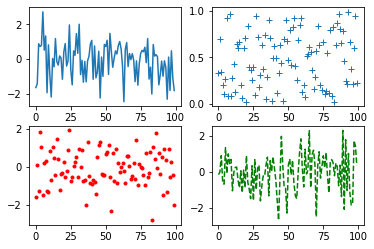

In [7]:
# on crée une figure avec 4 sous-graphiques
fig, ax=plt.subplots(2,2)
# on construit les 4 graphiques
ax[0,0].plot(np.random.randn(100))
ax[0,1].plot(np.random.random(size=100),"+")
ax[1,0].plot(np.random.randn(100),"r.")
ax[1,1].plot(np.random.randn(100), "g--")
# on sauvegarde l'image dans un fichier
plt.savefig("mes_graphiques2.jpg")
#plt.show() #si dans un IDE classique

Nous aurons tendance à privilégier la première approche qui est bien adaptée aux
notebooks mais nous serons amenés à utiliser parfois la seconde notamment dans
le cadre de graphiques plus interactifs.

### 1.3 Les paramètres globaux de vos graphiques
On peut choisir un style pour son graphique, on utilise :

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Voici les paramètres de ce style :

In [ ]:
plt.style.library['ggplot']

RcParams({'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#E5E5E5',
          'axes.grid': True,
          'axes.labelcolor': '#555555',
          'axes.labelsize': 'large',
          'axes.linewidth': 1.0,
          'axes.prop_cycle': cycler('color', ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']),
          'axes.titlesize': 'x-large',
          'figure.edgecolor': '0.50',
          'figure.facecolor': 'white',
          'font.size': 10.0,
          'grid.color': 'white',
          'grid.linestyle': '-',
          'patch.antialiased': True,
          'patch.edgecolor': '#EEEEEE',
          'patch.facecolor': '#348ABD',
          'patch.linewidth': 0.5,
          'xtick.color': '#555555',
          'xtick.direction': 'out',
          'ytick.color': '#555555',
          'ytick.direction': 'out'})

Pour utiliser le style ggplot, on utilise :

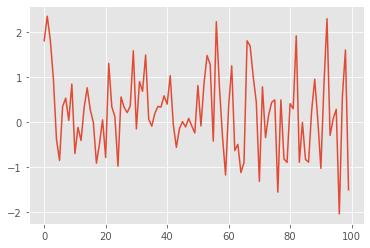

In [8]:
plt.style.use('ggplot')
plt.plot(np.random.randn(100))

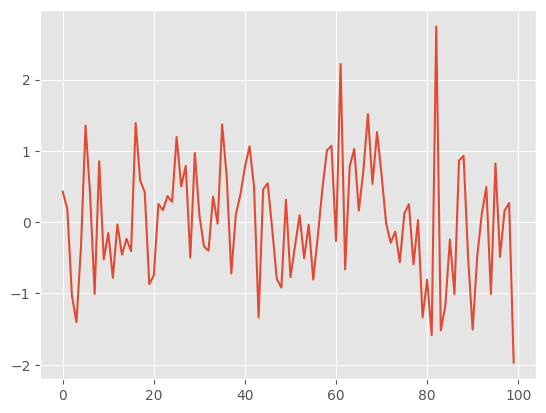

In [ ]:
# on peut aussi utiliser :
with plt.style.context('ggplot') :
    plt.plot(np.random.randn(100))

#### Changer des paramètres spécifiques

In [ ]:
plt.rc('lines', linewidth=2, color='r')

In [ ]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'

In [ ]:
# on peut aussi voir les paramètres par défaut
#print(plt.rcParamsDefault)

In [ ]:
# si on désire revenir aux paramètres par défaut, on utilise :
plt.rcdefaults()

#### Exporter un graphique
On peut utiliser :

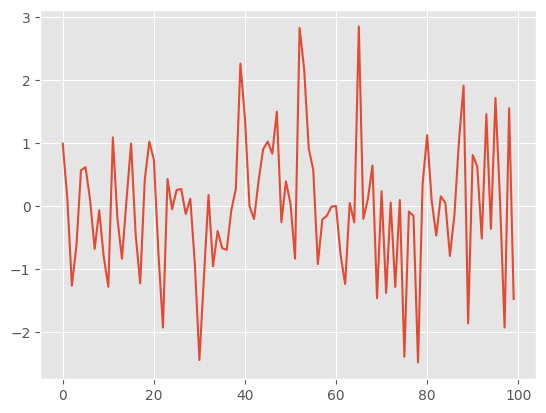

In [ ]:
with plt.style.context('ggplot'):
    plt.plot(np.random.randn(100))
plt.savefig("ggplot_style.png", dpi=600, transparent=True)

### 1.4 Définir son premier graphique

Si on désire dessiner un graphique simple, on pourra utiliser la fonction *plot()* :

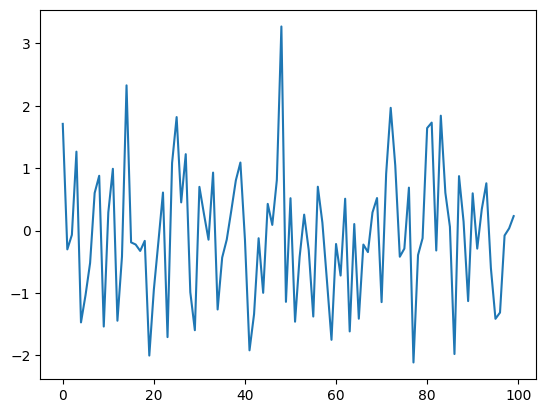

In [ ]:
plt.plot(np.random.randn(100))

On peut simplement ajouter des graphiques et des caractéristique à notre figure :

Text(0, 0.5, 'Valeur')

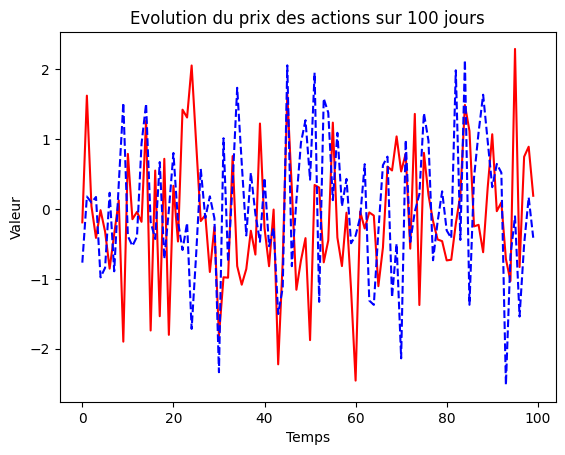

In [ ]:
# on génère un premier graphique (rouge avec une ligne continue entre les points)
plt.plot(np.random.randn(100),'r-' )
# on génère un second graphique (bleu avec une ligne pointillée entre les points)
plt.plot(np.random.randn(100),'b--' )
# on ajoute des infos sur le titre, les noms des axes
plt.title("Evolution du prix des actions sur 100 jours")
plt.xlabel("Temps")
plt.ylabel("Valeur")

Voici un exemple sur des données boursières, nous avons voulu représenter les
données issues des maximums et minimums quotidiens de l’indice CAC 40.

In [ ]:
# on récupère les données
cac40 = pd.read_csv("CAC40.csv", parse_dates=["time"])

In [ ]:
cac40.head()

,time,CAC 40,volume
0,1987-12-03 01:00:00,1018.78,0
1,1987-12-04 01:00:00,989.14,0
2,1987-12-07 01:00:00,964.20,0
3,1987-12-08 01:00:00,977.19,0
4,1987-12-09 01:00:00,969.56,0


In [ ]:
cac40["time"]=pd.to_datetime(cac40['time'])

<Axes: title={'center': 'Evolution de l’indice CAC40 depuis 1988'}, xlabel='time'>

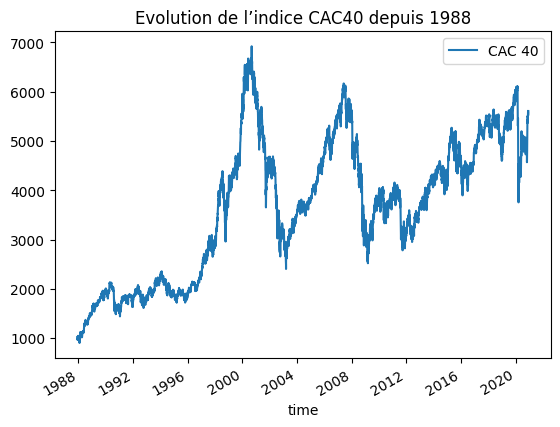

In [ ]:
cac40.plot(x="time", y="CAC 40",
           title="Evolution de l’indice CAC40 depuis 1988",
           legend=True)

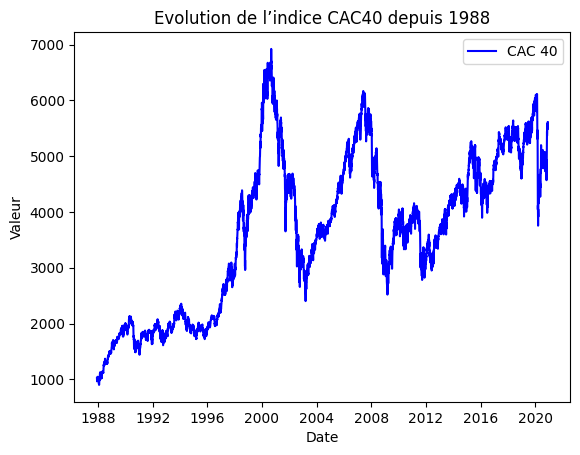

In [ ]:

# on affiche la courbe des valeurs en bleu
plt.plot(cac40["time"], cac40["CAC 40"], label="CAC 40",color="blue")
# on définit le nom des axes
plt.xlabel("Date")
plt.ylabel("Valeur")
# on définit le titre
plt.title("Evolution de l’indice CAC40 depuis 1988")
# on affiche la légende
plt.legend()

### 1.5 Nuage de points avec plt.scatter

On peut utiliser la fonction *plt.scatter()* pour dessiner un nuage de points.

In [ ]:
# on génère des données
x=np.random.random(size=100)
y=np.random.random(size=100)
taille = np.random.random(size=100)*100
couleurs=np.random.random(size=100)*100

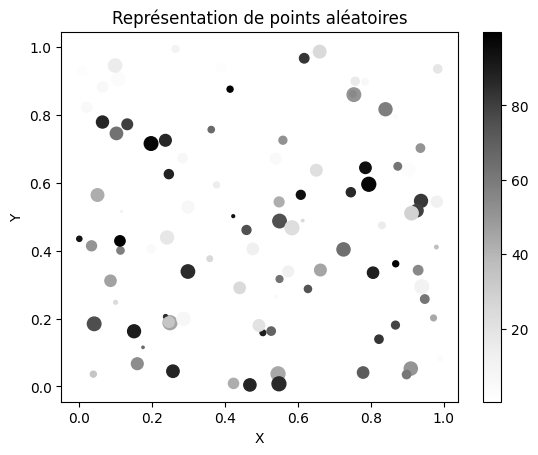

In [ ]:
# s représente la taille des points
# c représente les couleurs (on peut avoir une seule couleur)
# cmap permet de fournir à Matplotlib une palette de couleurs
plt.scatter(x,y,s=taille, c=couleurs, cmap=plt.get_cmap("Greys"))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Représentation de points aléatoires")
plt.colorbar()

Données AirBnB, on va simplement afficher des coordonnées géographiques
sous forme de nuage de points.

In [ ]:
# on commence par récupérer les données
listing=pd.read_csv("https://www.stat4decision.com/listings.csv.gz",index_col=0)

In [ ]:
listing.head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2577,https://www.airbnb.com/rooms/2577,20201012032825,2020-10-19,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://a0.muscache.com/pictures/09da057c-0120...,2827,https://www.airbnb.com/users/show/2827,Karine,...,10.0,10.0,10.0,NaN,t,1.0,1.0,0.0,0.0,0.05
3109,https://www.airbnb.com/rooms/3109,20201012032825,2020-10-18,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,Anne,...,10.0,10.0,10.0,NaN,f,1.0,1.0,0.0,0.0,0.19
4886,https://www.airbnb.com/rooms/4886,20201012032825,2020-10-18,Country-Style Studio Hip Area FREE CRUISE & WIFI,Bright and Cozy Studio Apartment for 2 Guests...,2 Free River Cruise Tix with your booking ! M...,https://a0.muscache.com/pictures/395578/e7f46d...,6792,https://www.airbnb.com/users/show/6792,Ryan Of Cobblestone,...,9.0,10.0,9.0,7511101570436,f,11.0,11.0,0.0,0.0,0.18
4890,https://www.airbnb.com/rooms/4890,20201012032825,2020-10-14,Quiet Historic & Cute +Free Cruise,Stylish & Classic One bedroom apartment for up...,"Called ""Paris Next Great Neighborhood"" from Tr...",https://a0.muscache.com/pictures/b144894f-bc55...,6792,https://www.airbnb.com/users/show/6792,Ryan Of Cobblestone,...,10.0,10.0,10.0,NaN,t,11.0,11.0,0.0,0.0,0.21
5396,https://www.airbnb.com/rooms/5396,20201012032825,2020-10-15,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,Borzou,...,10.0,10.0,8.0,7510402838018,f,1.0,1.0,0.0,0.0,1.64


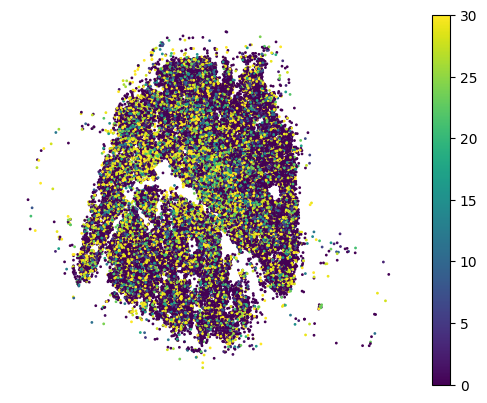

In [ ]:
plt.scatter("longitude","latitude", data=listing, s=1, c="availability_30")
plt.axis('off')
plt.colorbar()

### 1.6 Le graphique en bâtons avec plt.bar()
Voici un premier exemple de graphique en bâtons :

<BarContainer object of 5 artists>

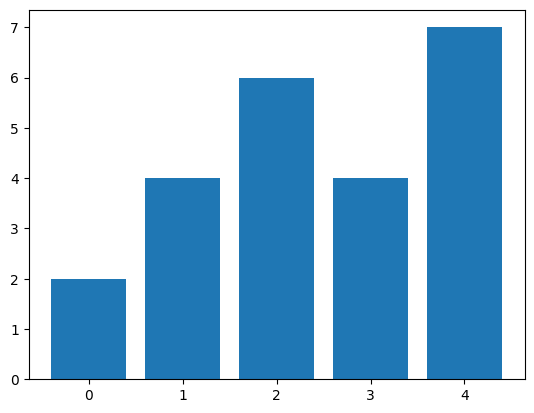

In [ ]:
plt.bar(range(5),[2,4,6,4,7])

In [ ]:
listing.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated',

Ce code est séparé en plusieurs parties :

- Dans une première partie, nous manipulons notre DataFrame pour en extraire les informations qui nous intéressent. Dans notre cas, il s’agit de deux objets Series qui rassemblent les nombres moyens de critiques des appartements en fonction de la possibilité de réserver instantanément le logement et en ajoutant un groupby pour calculer la moyenne en fonction des politiques d’annulation (nous ne prenons que les trois premières, ce qui se traduit par [:3]).
- Dans une seconde partie, nous définissons les caractéristiques de notre graphique, la largeur des barres et leur position avec une suite d’entiers. On peut alors dessiner les barres en utilisant plt.bar(). Nous les positionnons de chaque côté de la marque numérique définie plus haut.
- Dans une troisième partie, nous modifions les ticks en utilisant les différentes politiques d’annulation et ajoutons une légende.

In [ ]:
review_means_resa=listing[listing["instant_bookable"]=="t"]\
                    .groupby("host_is_superhost").number_of_reviews.mean()
review_means_noresa=listing[listing["instant_bookable"]=="f"]\
                    .groupby("host_is_superhost").number_of_reviews.mean()
ind = np.arange(len(review_means_resa[:3]))
width = 0.35


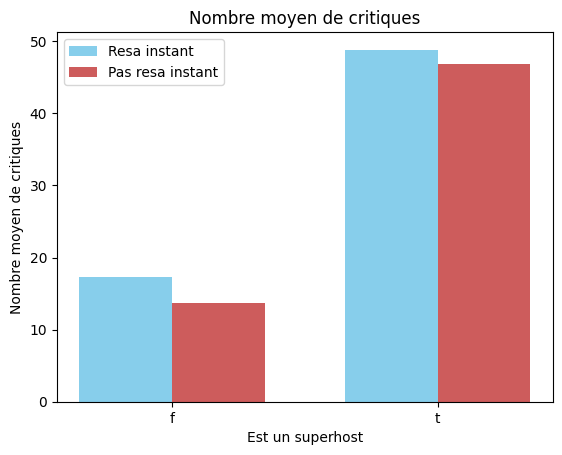

In [ ]:

plt.bar(ind - width/2, review_means_resa[:3], width,
                color='SkyBlue', label='Resa instant')
plt.bar(ind + width/2, review_means_noresa[:3], width,
color = 'IndianRed', label = 'Pas resa instant')

plt.ylabel('Nombre moyen de critiques')
plt.xlabel("Est un superhost")
plt.title("Nombre moyen de critiques")
plt.xticks(ind, review_means_resa.index[:3])
plt.legend()


In [ ]:
review_means_resa

,number_of_reviews
host_is_superhost,
f,17.271125
t,48.827815


Text(0.5, 1.0, 'Nombre moyen de critiques')

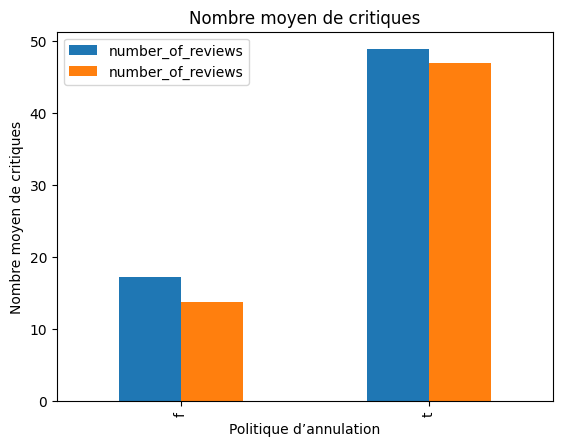

In [ ]:
pd.concat([review_means_resa, review_means_noresa],axis=1).plot.bar()
plt.ylabel('Nombre moyen de critiques')
plt.xlabel("Politique d’annulation")
plt.title("Nombre moyen de critiques")

### 1.7 La construction d’un pie chart
Le pie chart est souvent connu sous le nom de camembert en français. Ce graphique est assez pauvre mais il est fréquemment utilisé.

Un pie chart est simple à mettre en oeuvre avec Matplotlib, si nous reprenons l’exemple vu juste au-dessus :

([<matplotlib.patches.Wedge at 0x7ee1e714d9c0>,
 [Text(0.8034138052574705, 0.7513496240244694, 'f'),
  Text(-0.8034138052574704, -0.7513496240244695, 't')],
 [Text(0.43822571195862026, 0.4098270676497105, '23.9%'),
  Text(-0.4382257119586202, -0.40982706764971055, '76.1%')])

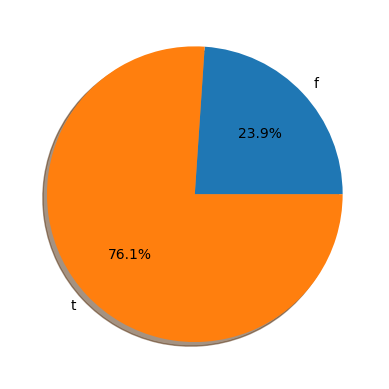

In [ ]:
# on construit les groupes grâce aux données AirBnB
review_means=listing.groupby("host_is_superhost").number_of_reviews.mean()

# on affiche le graphique
plt.pie(review_means[:3],
        labels=review_means.index[:3],
        autopct='%1.1f%%', shadow=True)

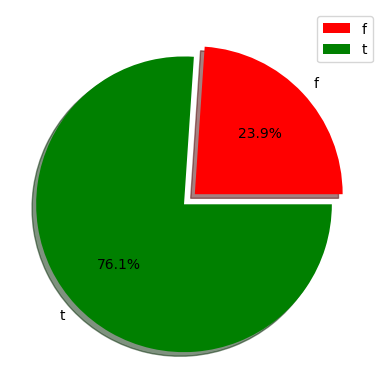

In [ ]:
plt.pie(review_means[:3],
        labels=review_means.index[:3],
           colors = ['red', 'green'],
           explode = [0, 0.1],
           autopct = '%1.1f%%',

           shadow = True)
plt.legend()

### 1.8 Les barres d’erreurs avec plt.errorbar()

Il arrive souvent que l’on veuille représenter des barres d’erreur liées aux observations.

Cette fonction nous permet de construire un graphique classique (comme avec *plt.plot()*) en ajoutant des barres d’erreurs.

Ces barres d’erreurs peuvent prendre différentes formes et différentes tailles.

Si nous tentons de représenter les données d’une enquête sur 1 000 personnes
avec les marges d’erreurs, en utilisant les quantiles de la distribution normale :

In [ ]:
import scipy.stats

([<matplotlib.axis.XTick at 0x7ee1d58f4d60>,
 [Text(1.0, 0, 'A'), Text(2.0, 0, 'B'), Text(3.0, 0, 'C'), Text(4.0, 0, 'D')])

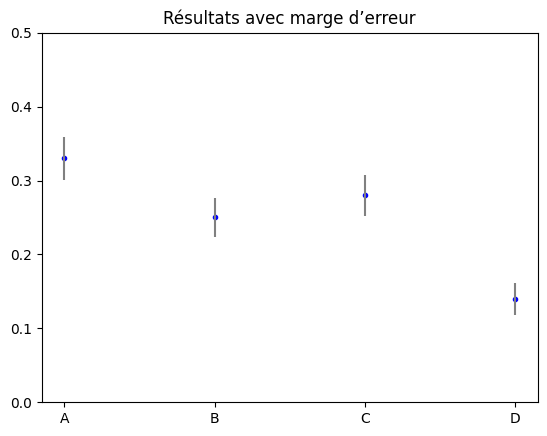

In [ ]:
# résultats des 4 candidats
data=np.array([.33,.25,.28,.14])
x=np.linspace(1,4,4)
# calul de la marge d’erreur
marge=np.sqrt(data*(1-data)/1000)*scipy.stats.distributions.norm.ppf(0.975)
# affichage du résultat
plt.errorbar(x, data, yerr=marge, fmt='.b', ecolor="grey",barsabove=True)
plt.title("Résultats avec marge d’erreur")
plt.ylim([0,0.5])
plt.xticks(x,["A","B","C","D"])

On peut modifier l’aspect des barres d’erreurs en utilisant par exemple *plt.style.use()* avec un style différent.

On ajoute aussi les bornes des barres.

([<matplotlib.axis.XTick at 0x7ee1dbf1e8c0>,
 [Text(1.0, 0, 'A'), Text(2.0, 0, 'B'), Text(3.0, 0, 'C'), Text(4.0, 0, 'D')])

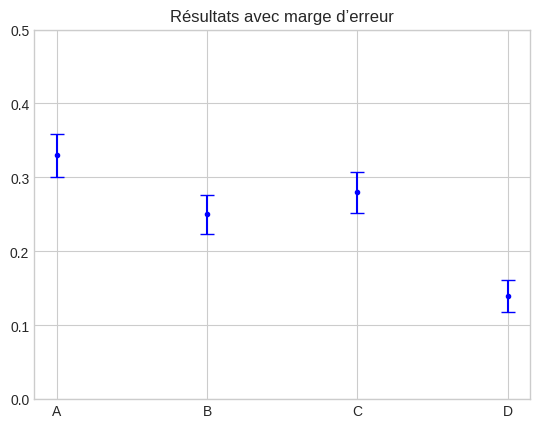

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.errorbar(x, data, yerr=marge,fmt='.b',capsize=5);
plt.title("Résultats avec marge d’erreur")
plt.ylim([0,0.5])
plt.xticks(x,["A","B","C","D"])

In [ ]:
# si on désire revenir aux paramètres par défaut, on utilise :
plt.rcdefaults()

### 1.9 La construction d’histogrammes

Les histogrammes sont des outils de description des données extrêmement importants afin d’aider à déterminer la distribution sous-jacente à chaque variable quantitative.

Si nous désirons créer deux histogrammes associés à deux variables ayant les mêmes échelles sur le même graphique, nous utilisons le code suivant :

In [ ]:
# on génère les données
data1=np.random.randn(100000)+1
data2=np.random.randn(100000)

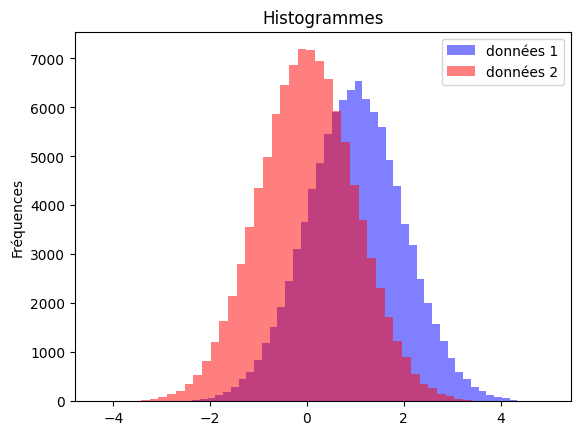

In [ ]:
# 1er histogramme
plt.hist(data1, bins=50, color="blue", label="données 1", alpha=0.5)
# 2nd histogramme
plt.hist(data2, bins=50, color="red", label="données 2", alpha = 0.5)
plt.title("Histogrammes")
plt.ylabel("Fréquences")
plt.legend()

Dans ce code, on utilise *label=* pour donner un nom aux données.

Le *alpha=* est utilisé afin d’afficher les graphiques en transparence et gère le degré d’opacité des graphiques.

### 1.10 Personnaliser vos graphiques Matplotlib

#### Ajouter plusieurs graphiques sur le même graphique

Jusqu’ici, nous avons utilisé des graphiques simples, il peut devenir vite nécessaire de combiner plusieurs graphiques sur la même figure. Pour cela, on va utiliser deux
approches. Nous travaillons sur les données du CAC 40.

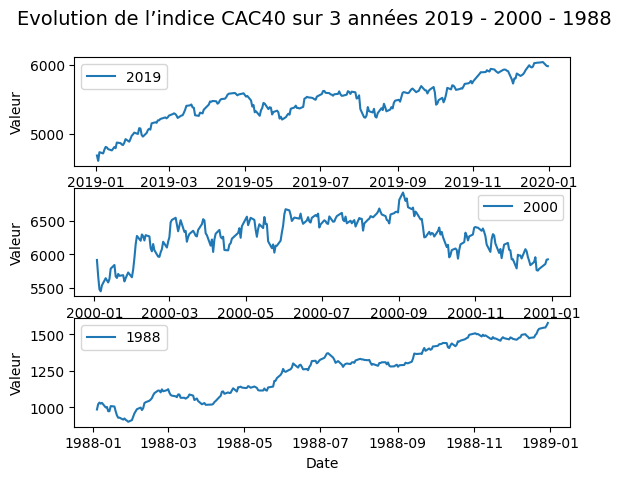

In [ ]:
# on crée les données
cac40_2019 = cac40[(cac40.time<"2020-01-01") & (cac40.time>"2019-01-01")]
cac40_1988 = cac40[(cac40.time<"1989-01-01") & (cac40.time>"1988-01-01")]
cac40_2000 = cac40[(cac40.time<"2001-01-01") & (cac40.time>"2000-01-01")]
# on crée une figure
plt.figure()
# on définit le titre de cette figure
plt.suptitle("Evolution de l’indice CAC40 sur 3 années 2019 - 2000 - 1988",
             fontsize=14)
# on se concentre sur le premier sous graphique
plt.subplot(311)
plt.plot(cac40_2019["time"],cac40_2019["CAC 40"], label="2019")
plt.ylabel("Valeur")
plt.legend()
# on se concentre sur le second sous graphique
plt.subplot(312)
plt.plot(cac40_2000["time"], cac40_2000["CAC 40"], label="2000")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.legend()
# on se concentre sur le troisième sous graphique
plt.subplot(313)
plt.plot(cac40_1988["time"], cac40_1988["CAC 40"], label="1988")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.legend()

La fonction subplot permet de définir le graphique sur lequel vous travaillez.

Ainsi, le code 212 veut dire qu’on travaille sur une figure avec deux graphiques en ligne et un seul en colonne. Le dernier chiffre définit le graphique que l’on modifie.

Avec la fonction plt.subplots() :

Text(0.5, 0, 'Date')

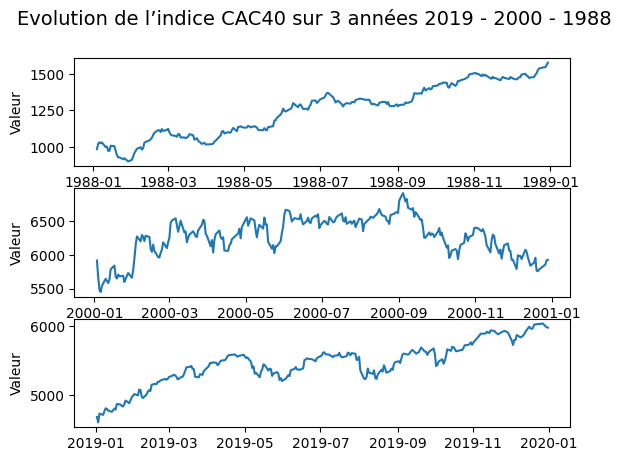

In [ ]:
# on définit les données à utiliser
data=[cac40_1988,cac40_2000, cac40_2019]
# on construit les sous-graphiques qui partagerons l’axe y
f, axes = plt.subplots(len(data), 1)
# on définit le titre de la figure
f.suptitle("Evolution de l’indice CAC40 sur 3 années 2019 - 2000 - 1988",
             fontsize=14)
# pour chaque sous-graphique, on ajoute un plot
for ax, data in zip(axes, data) :
    ax.plot(data["time"], data["CAC 40"] )
    ax.set_ylabel("Valeur")
# finalement, on ajoute le titre de l’axe des x
axes[1].set_xlabel("Date")

On voit qu’on a automatisé un peu plus le traitement et qu’on crée des objets pour chaque sous-graphique. La fonction *plt.subplots()* permet d’obtenir une liste de sous-graphiques que nous avons stockés dans axes.

#### Personnaliser les légendes et les colorbar

Les légendes et les colorbar (légendes pour des dégradés de couleurs représentant une variable quantitative) peuvent être facilement modifiés.

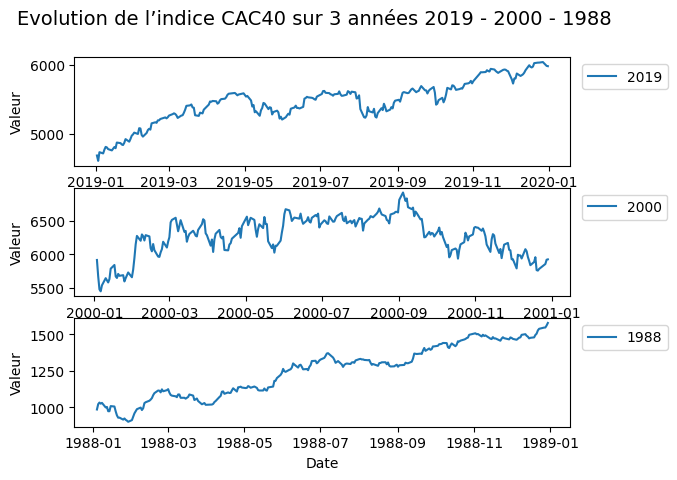

In [ ]:
# on crée les données
cac40_2019 = cac40[(cac40.time<"2020-01-01") & (cac40.time>"2019-01-01")]
cac40_1988 = cac40[(cac40.time<"1989-01-01") & (cac40.time>"1988-01-01")]
cac40_2000 = cac40[(cac40.time<"2001-01-01") & (cac40.time>"2000-01-01")]
# on crée une figure
plt.figure()
# on définit le titre de cette figure
plt.suptitle("Evolution de l’indice CAC40 sur 3 années 2019 - 2000 - 1988",
             fontsize=14)
# on se concentre sur le premier sous graphique
plt.subplot(311)
plt.plot(cac40_2019["time"],cac40_2019["CAC 40"], label="2019")
plt.ylabel("Valeur")
plt.legend(bbox_to_anchor=(1.01,1),loc=2,borderaxespad=0.5)
# on se concentre sur le second sous graphique
plt.subplot(312)
plt.plot(cac40_2000["time"], cac40_2000["CAC 40"], label="2000")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.legend(bbox_to_anchor=(1.01,1),loc=2,borderaxespad=0.5)
# on se concentre sur le troisième sous graphique
plt.subplot(313)
plt.plot(cac40_1988["time"], cac40_1988["CAC 40"], label="1988")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.legend(bbox_to_anchor=(1.01,1),loc=2,borderaxespad=0.5)

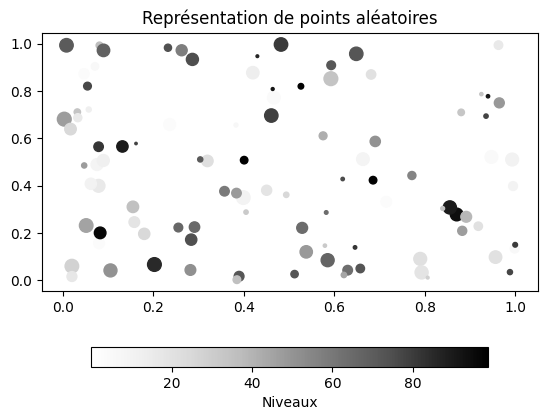

In [ ]:
x=np.random.random(size=100)
y=np.random.random(size=100)
taille=np.random.random(size=100)*100
couleurs=np.random.random(size=100)*100
# s représente la taille des points
# c représente les couleurs (on peut avoir une seule couleur)
# cmap permet de fournir à Matplotlib une palette de couleurs
plt.scatter(x,y,s=taille, c=couleurs, cmap=plt.get_cmap("Greys"))
plt.title("Représentation de points aléatoires")
# on affiche la colorbar horizontalementet on lui ajoute une description
plt.colorbar(orientation="horizontal", shrink=0.8).set_label("Niveaux")

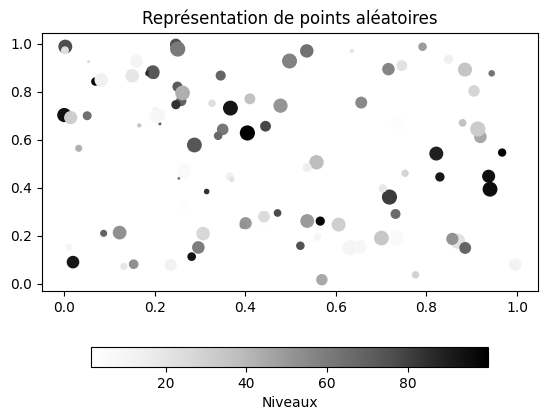

In [ ]:
x = np.random.random(size=100)
y = np.random.random(size=100)
taille = np.random.random(size=100)*100
couleurs = np.random.random(size=100)*100

# s représente la taille des points
# c représente les couleurs (on peut avoir une seule couleur)
# cmap permet de fournir à Matplotlib une palette de couleurs
plt.scatter(x,y,s=taille, c=couleurs, cmap=plt.get_cmap("Greys"))
plt.title("Représentation de points aléatoires")
plt.colorbar(orientation="horizontal", shrink=0.8).set_label("Niveaux")


#### Insérer du texte dans un graphique
Il existe deux fonctions principales pour ajouter du texte dans un graphique : *plt.text()* et *plt.annotate()*. La première permet d’ajouter un texte à une position spécifique et la seconde permet d’ajouter une annotation.

Si nous essayons d’ajouter des valeurs sur un graphique, on utilisera *plt.text()* :

(-10.0, 10.0, 0.0, 0.16)

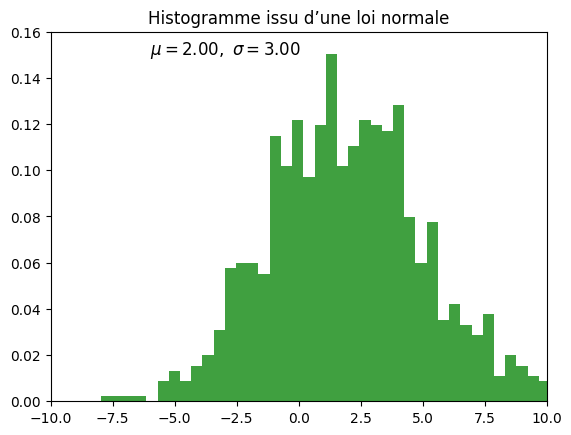

In [ ]:
moyenne=2
sigma=3
plt.hist(sigma*np.random.randn(1000)+moyenne, 50, density=True,facecolor='g', alpha=0.75)
plt.title("Histogramme issu d’une loi normale")
plt.text(-6, .15, '$\mu= %.2f,\ \sigma= %.2f$' %(moyenne, sigma), fontsize=12)
plt.axis([-10,10,0,0.16])

(-10.0, 10.0, 0.0, 0.16)

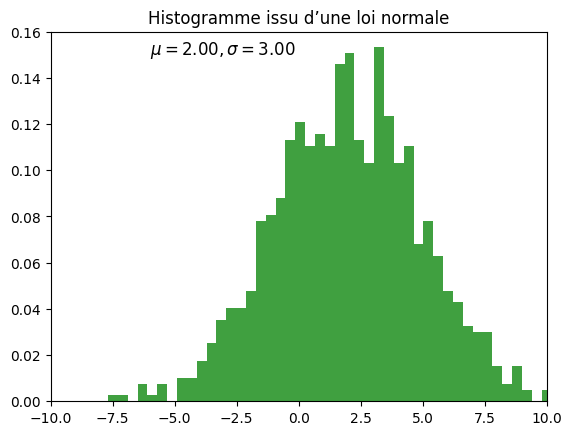

In [ ]:
moyenne=2
sigma=3
plt.hist(sigma*np.random.randn(1000)+moyenne, 50, density=True, facecolor='g', alpha=0.75)
plt.title("Histogramme issu d’une loi normale")
plt.text(-6, .15, f'$\\mu= {moyenne:.2f}, \\sigma= {sigma:.2f}$', fontsize=12)
plt.axis([-10,10,0,0.16])



On peut aussi ajouter des annotations sur un graphique :

Text(12004.083333333334, 6922.33, 'Maximum : 6922.33')

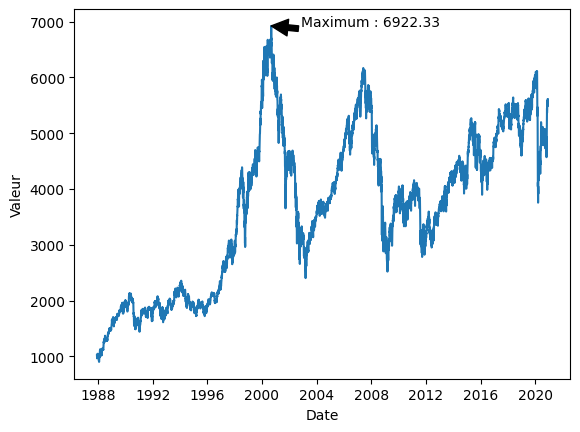

In [ ]:
import matplotlib.dates as mdates
# on extrait la valeur maximale sur l’année
maximum_annee = cac40["CAC 40"].max()
# on extrait la date du maximum que l’on transforme en nombre
date_maximum_num = mdates.date2num(cac40.loc[cac40["CAC 40"].idxmax(),
"time"])
# on représente les données
plt.plot(cac40["time"], cac40["CAC 40"], label="Cours")
plt.xlabel("Date")
plt.ylabel("Valeur")
# on ajoute l’annotation
plt.annotate("Maximum : %.2f" %(maximum_annee),
xy = (date_maximum_num, maximum_annee),
xytext = (date_maximum_num+800, maximum_annee),
arrowprops = dict(facecolor='black'))

### 1.11 Créer un graphique animé
Matplotlib vous permet de générer des graphiques animés, c’est-à-dire des vidéos
dans lesquelles vous allez pouvoir faire évoluer votre graphique.

On va installer ffmpeg.

Ceci va nous permettre de générer des fichiers vidéo.

Si on désire construire une vidéo permettant de visualiser l’évolution d’un nuage de points dans lequel la taille des points évolue avec le temps.

Pour créer n’importe quel type de graphique animé, il faut donc utiliser la classe *FuncAnimation* qui va prendre comme paramètres :

- fig : la figure utilisée.
- func : une fonction qui sera appelée lors de la génération de chaque image de la vidéo. Le premier argument de cette fonction doit être le numéro de l’image (on utilise i dans notre exemple).
- init_func : si on désire utiliser une fonction de génération de la première image.
- interval : délai entre les images en millisecondes.
- frames : définition de l’itérable à fournir à chaque image (on utilise un entier, cette valeur génère une suite d’entiers débutant à 0).

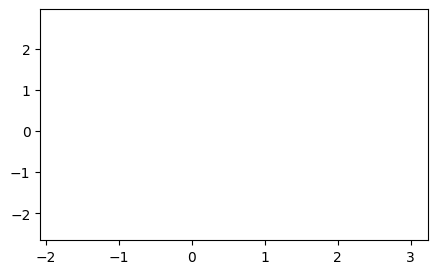

In [ ]:
from matplotlib.animation import FuncAnimation
# définition de la figure
fig, ax = plt.subplots(figsize=(5, 3))
# génération des données
x=np.random.randn(100)
y = np.random.randn(100)
z = 10*np.random.random(100)
# définition du graphique
nuage = ax.scatter(x, y)
# fonction d’animation
def animate(i) :
    nuage.set_sizes(z*i)
# construction de l’objet animé
anim = FuncAnimation(fig, animate, interval=100, frames=len(y)-1)
# sauvegarde du fichier
anim.save('nuage-points.mp4')
plt.close()

Voici l'animation obtenue :

<video controls src="nuage-points.mp4"> Nuage de points</video>

## 2. Seaborn pour des représentations plus élaborées
### 2.1 Utilisation de Seaborn

Seaborn est un autre package intéressant pour la création de graphiques. Il est
basé sur Matplotlib et en utilise les principes. Son principal intérêt réside dans la création de graphiques plus spécifiques en quelques lignes de code.

In [ ]:
import seaborn as sns

### 2.2 Le box-plot ou la boîte à moustaches

Un box plot (appelé aussi une boîte à moustache) est un graphique utilisé fréquemment pour l’exploration des données. Il permet de visualiser pour une variable ou pour un groupe d’individus le comportement global des individus.

Nous utiliserons ici des données de la région Île-de-France sur les communes de
la (données open data Île-de-France, voir le début du chapitre 4 pour une description des données).

On représente le box-plot du nombre de naissances par commune en fonction du département d’Île-de-France :

Text(0.5, 1.0, 'Box plot du nombre de naissances par habitant par département')

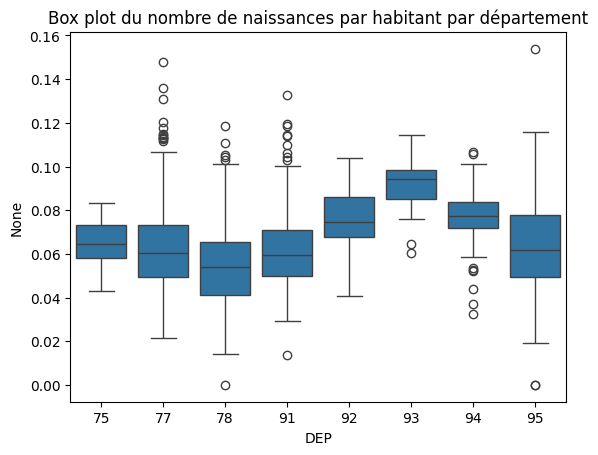

In [ ]:
# on récupère les données
data_idf=pd.read_csv("base-comparateur-de-territoires.csv",sep=";")

sns.boxplot(x=data_idf["DEP"], y=data_idf["NAIS0914"]/ data_idf["P09_POP"])
plt.title("Box plot du nombre de naissances par habitant par département")

Les box plots de Seaborn offrent d’autres possibilités, notamment d’utiliser le paramètre *data =* qui va simplifier notre code :

Text(0.5, 1.0, 'Box-plot entaillé par département')

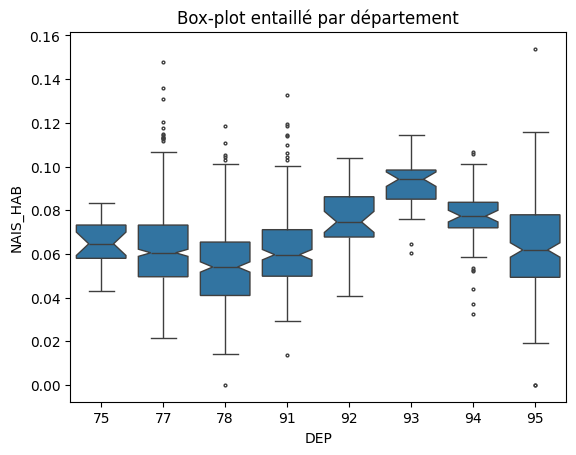

In [ ]:
# on crée une nouvelle colonne
data_idf["NAIS_HAB"]= data_idf["NAIS0914"]/data_idf["P09_POP"]
# on crée le box plot
sns.boxplot(x="DEP",y="NAIS_HAB", data=data_idf, linewidth=1,
            notch=True, fliersize=2)
plt.title("Box-plot entaillé par département")

### 2.3 Violin plot

Les violons ou violin plot sont des graphiques importants en visualisation de
données, ils permettent de visualiser la répartition des données et la boîte à moustache associée.

Pour obtenir un graphique en violons, on utilise :

Text(0.5, 1.0, 'Violin-plot par département')

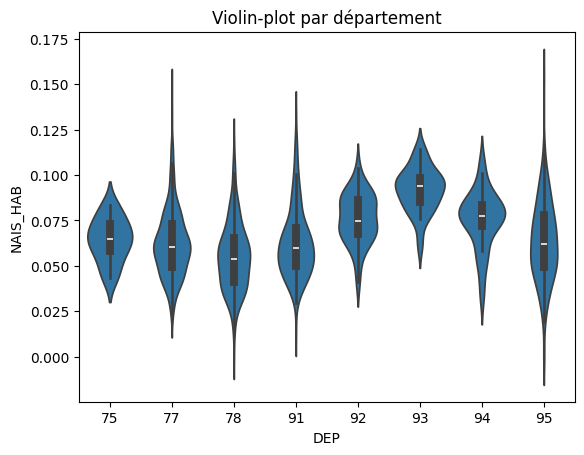

In [ ]:
sns.violinplot(x="DEP",y="NAIS_HAB", data=data_idf)
plt.title("Violin-plot par département")

Si nous prenons maintenant les données AirBnB, on voudrait représenter le niveau
des évaluations sur un logement en fonction du type de chambre et du type d’hôte
(super-host ou non) :

In [ ]:
# on récupère les données
listing=pd.read_csv("listing_extrait.csv",index_col=0)

Text(0.5, 1.0, 'Graphique en violons du score moyen des logements')

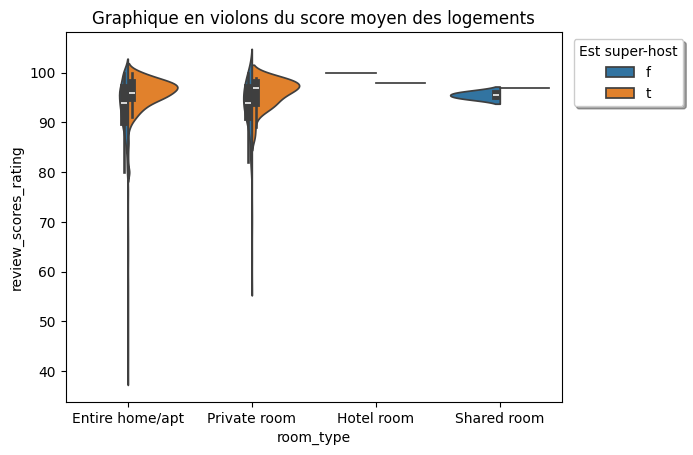

In [ ]:
# on construit notre graphique en séparant notre violin plot en deux parties
sns.violinplot(x="room_type",y="review_scores_rating", hue="host_is_superhost",
               split=True,data=listing)

plt.legend(bbox_to_anchor=(1.01, 1), shadow=True, loc=2,
           borderaxespad = 0.5, title = "Est super-host")
plt.title("Graphique en violons du score moyen des logements")

### 2.4 Les distplot() de Seaborn

Les distplot de Seaborn sont des visualisations des distributions de probabilité des variables quantitatives.

Ce graphique se rapproche beaucoup des histogrammes mais il ajoute la représentation de la distribution empirique des données.

<Axes: ylabel='Count'>

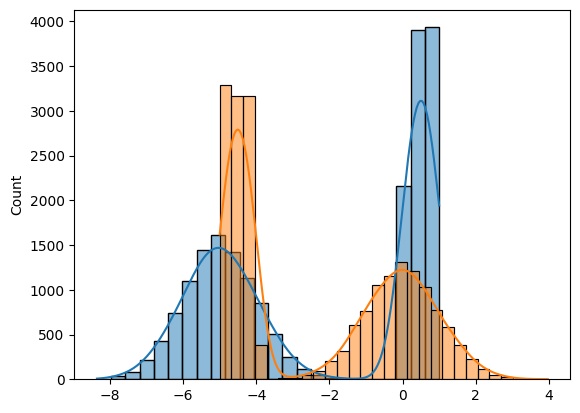

In [ ]:
# on génère des données
var=np.concatenate([np.random.randn(10000)-5,
                    np.random.beta(1,1, size=10000)],
                   axis=0)
var2=np.concatenate([np.random.randn(10000),
                     np.random.beta(1,1,size=10000)-5],
                    axis=0)
# on affiche les distributions
sns.histplot(var,kde=True)
sns.histplot(var2,kde=True)

### 2.5 Les pairplot() de Seaborn ou la matrice de graphiques

Le pairplot de Seaborn est un outil très efficace pour représenter les variables
quantitatives d’un DataFrame (à condition de ne pas trop en avoir).

Un pairplot va construire une figure avec à l’intérieur une matrice de graphiques.

Les éléments sur la diagonale sont des distplot et les éléments hors de la diagonale sont des nuages de points qui croisent les variables deux à deux.

Si nous essayons de représenter ce graphique par département sur les données
de la région Ile-de-France :

In [ ]:
data_idf['DEP'] = data_idf['DEP'].astype('category')

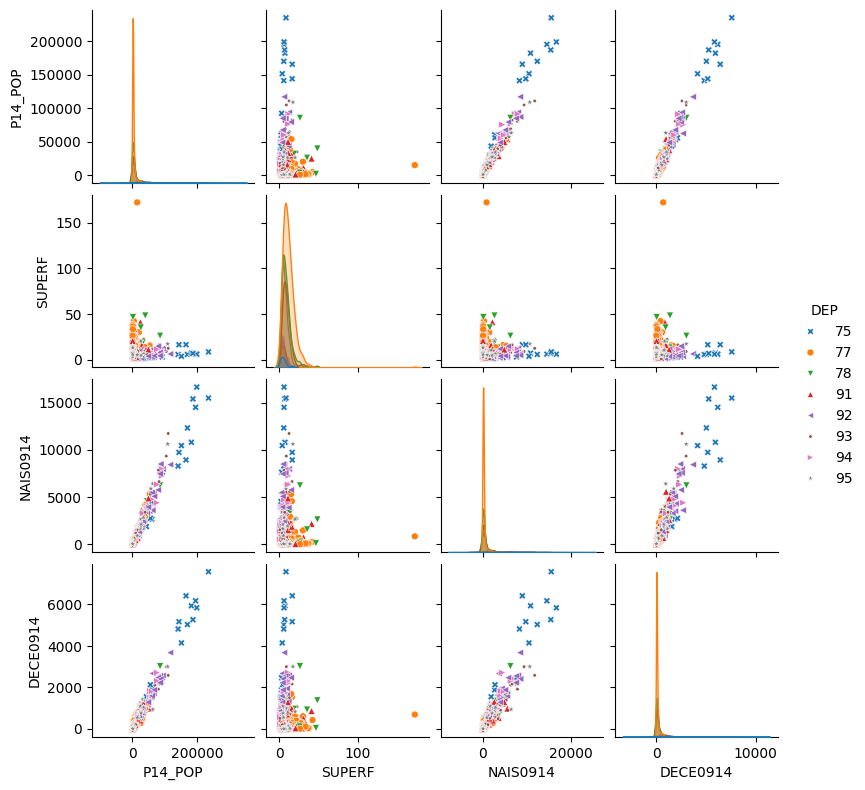

In [ ]:
sns.pairplot(data=data_idf, hue='DEP',
vars=['P14_POP', 'SUPERF','NAIS0914', 'DECE0914'],
height=2, plot_kws={"s": 25},
markers=['X','o','v','^','<','.','>',"*"])


L’argument *plot_kws* est un argument qui permet de définir des propriétés plus spécifiques du graphique.

Il attend un dictionnaire de propriétés-valeurs. Ici on définit la taille des points dans les nuages de points.

### 2.6 Les jointplot()

Le jointplot est un graphique qui permet de représenter le croisement entre deux
variables quantitatives. Il affiche simultanément un nuage de points et des histogrammes pour chaque variable.

Si nous travaillons sur le nombre de décès et de naissances en fonction de la population des communes d’Ile-de-France, nous aurons :

In [ ]:
# construction de nouvelles variables
data_idf['DECE_HAB']=data_idf['DECE0914']/data_idf["P14_POP"]
data_idf['NAISS_HAB']=data_idf['NAIS0914']/data_idf["P14_POP"]

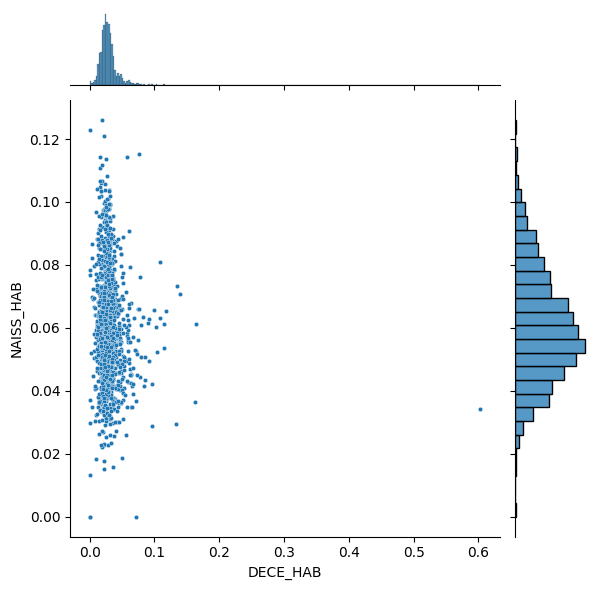

In [ ]:
# représentation du jointplot
ax = sns.jointplot(x='DECE_HAB',
                   y='NAISS_HAB',
                   data=data_idf,
                   joint_kws={"s": 10})

Il existe bien d'autres fonctionnalités de Matplotlib et Seaborn, n'hésitez pas à consulter la documentation des ces packages :
- https://matplotlib.org/
- https://seaborn.pydata.org/